#  Predicting NCAA Basketball Performance Using the Four Factors


<b>William Thomas</b>
<br>
<b>March 14th, 2018</b>

The Four factors are the box score derived metrics that correlate most closely with winning basketball games. These factors also identify a team’s strategic strengths and weaknesses. I will be applying these metrics to NCAA basketball teams from 2017-18 using data before the start of the NCAA Tournament. This project was inspired in terms of format by Wayne Winston's book <i>Mathletics</i> https://www.amazon.com/Mathletics-Gamblers-Enthusiasts-Mathematics-Basketball/dp/0691154589
<br>

The goal of the project is We to use use regression analysis to evaluate the importance of the four factors in performance for college basketball.

# Importing Libraries

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Get the Data

We'll be working with the NCAA 2017-18 csv file that was created using advanced data from https://www.basketball-reference.com/
<br /> 

For those who may not be familiar with bastketball statistic termonology, I will go over the variables stored within this dataset and explain what its meaning and significance. The Four factors can be applied to both a team’s offense and defense, hence it gives us eight factors.

<b>Variables: Four Factors for Team Offense</b>

1. Effective Field Goal Percentage (EFG): Gives 50% more credit for making a three-point shot because a  three- pointer is worth 50% more points than a  two- point ﬁeld goal. Known as <b>Offensive Shooting</b> in the dataset.
2. Turnovers Committed per Possession (TPP): A possession starts when a team gets the basketball and ends when they give up control of the basketball. Known as <b>Offensive TOs</b> in the dataset.
3. Offensive Rebounding Percentage (ORP): the percentage of rebounds a team gets of their missed shots. Known as <b>Offensive Rebounding</b> in the dataset.
4. Free Throw Rate (FTR): foul shots made divided by ﬁeld goal attempts. FTR is impacted by how often a team gets to the foul line as well as by their free throw percentage. Known as <b>Offensive FTs</b> in the dataset.

<b>Variables: Four Factors for Team Dffense</b>
1. Opponent’s Effective Field Goal Percentage (OEFG). Known as <b>Defensive Shooting</b> in the dataset.
2. Defensive Turnovers Caused per Possession (DTPP). Known as <b>Defensive TOs</b> in the dataset.
3. Defensive Rebounding Percentage (DRP): percentage of rebounds a team gets of their opponent’s missed shots. Known as <b>Defensive Rebounding</b> in the dataset.
4. Opponent’s Free Throw Rate (OFTR): foul shots made by the opposing team divided by ﬁeld goal attempts made by the opposing team. Known as <b>Defensive FTs</b> in the dataset.

<b>Variables: Other</b>
1. Tournament Appearence. Represented as dummy variables (0 and 1). 0 means the team failed to make a tournament appearence this year while 1 means they did. Known as <b>Tournament</b> in the dataset.
2. Strength of Schedule (SOS): a rating of strength of schedule. The rating is denominated in points above/below average, where zero is average. Non-Division I games are excluded from the ratings. Known as <b>SOS</b> in the dataset. 
3. <b>Wins</b>. 
4. <b>School</b>. 


<b>Read in the NCAA 2017-18 csv ﬁle as a DataFrame called NCAA.</b>

In [361]:
NCAA = pd.read_csv('NCAA 2017-18.csv')

<b>Check the head of NCAA , and check out its info() and describe() methods.</b>

In [362]:
NCAA.head()

,School,Wins,Offensive Shooting,Defensive Shooting,Offensive FTs,Defensive FTs,Offensive Rebounding,Defensive Rebounding,Offensive TOs,Defensive TOs,SOS,Tournament
0,Abilene Christian,16,0.521,0.499,0.309,0.422,49.7,50.3,17.7,19.5,-6.55,0
1,Air Force,12,0.490,0.549,0.318,0.328,48.7,51.3,16.3,18.3,2.01,0
2,Akron,14,0.519,0.533,0.319,0.384,49.1,50.9,17.3,16.2,-1.76,0
3,Alabama A&M,3,0.450,0.540,0.314,0.298,48.2,51.8,20.9,14.4,-7.94,0
4,Alabama,19,0.516,0.472,0.414,0.368,50.2,49.8,17.6,16.1,10.57,1


In [323]:
NCAA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 12 columns):
School                  351 non-null object
Wins                    351 non-null int64
Offensive Shooting      351 non-null float64
Defensive Shooting      351 non-null float64
Offensive FTs           351 non-null float64
Defensive FTs           351 non-null float64
Offensive Rebounding    351 non-null float64
Defensive Rebounding    351 non-null float64
Offensive TOs           351 non-null float64
Defensive TOs           351 non-null float64
SOS                     351 non-null float64
Tournament              351 non-null int64
dtypes: float64(9), int64(2), object(1)
memory usage: 33.0+ KB


In [324]:
NCAA.describe()

,Wins,Offensive Shooting,Defensive Shooting,Offensive FTs,Defensive FTs,Offensive Rebounding,Defensive Rebounding,Offensive TOs,Defensive TOs,SOS,Tournament
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,16.703704,0.513085,0.506145,0.336584,0.333615,50.367236,49.632764,16.041311,16.322792,-0.163077,0.193732
std,5.944309,0.030190,0.026493,0.044877,0.053454,2.560275,2.560275,1.611823,1.833948,5.642478,0.395786
min,3.000000,0.426000,0.426000,0.225000,0.218000,42.600000,42.600000,12.200000,11.800000,-12.350000,0.000000
25%,12.000000,0.494000,0.489000,0.306500,0.297000,48.800000,48.100000,15.050000,15.100000,-4.100000,0.000000
50%,17.000000,0.512000,0.505000,0.332000,0.327000,50.500000,49.500000,16.000000,16.200000,-1.610000,0.000000
75%,21.000000,0.533000,0.523000,0.369000,0.371500,51.900000,51.200000,17.100000,17.600000,3.725000,0.000000
max,31.000000,0.605000,0.579000,0.463000,0.491000,57.400000,57.400000,20.900000,24.000000,12.440000,1.000000


In [325]:
NCAA.columns

Index(['School', 'Wins', 'Offensive Shooting', 'Defensive Shooting',
       'Offensive FTs', 'Defensive FTs', 'Offensive Rebounding',
       'Defensive Rebounding', 'Offensive TOs', 'Defensive TOs', 'SOS',
       'Tournament'],
      dtype='object')

# Exploratory Data Analysis

<b>Exploring the types of relationships across the entire dataset</b>

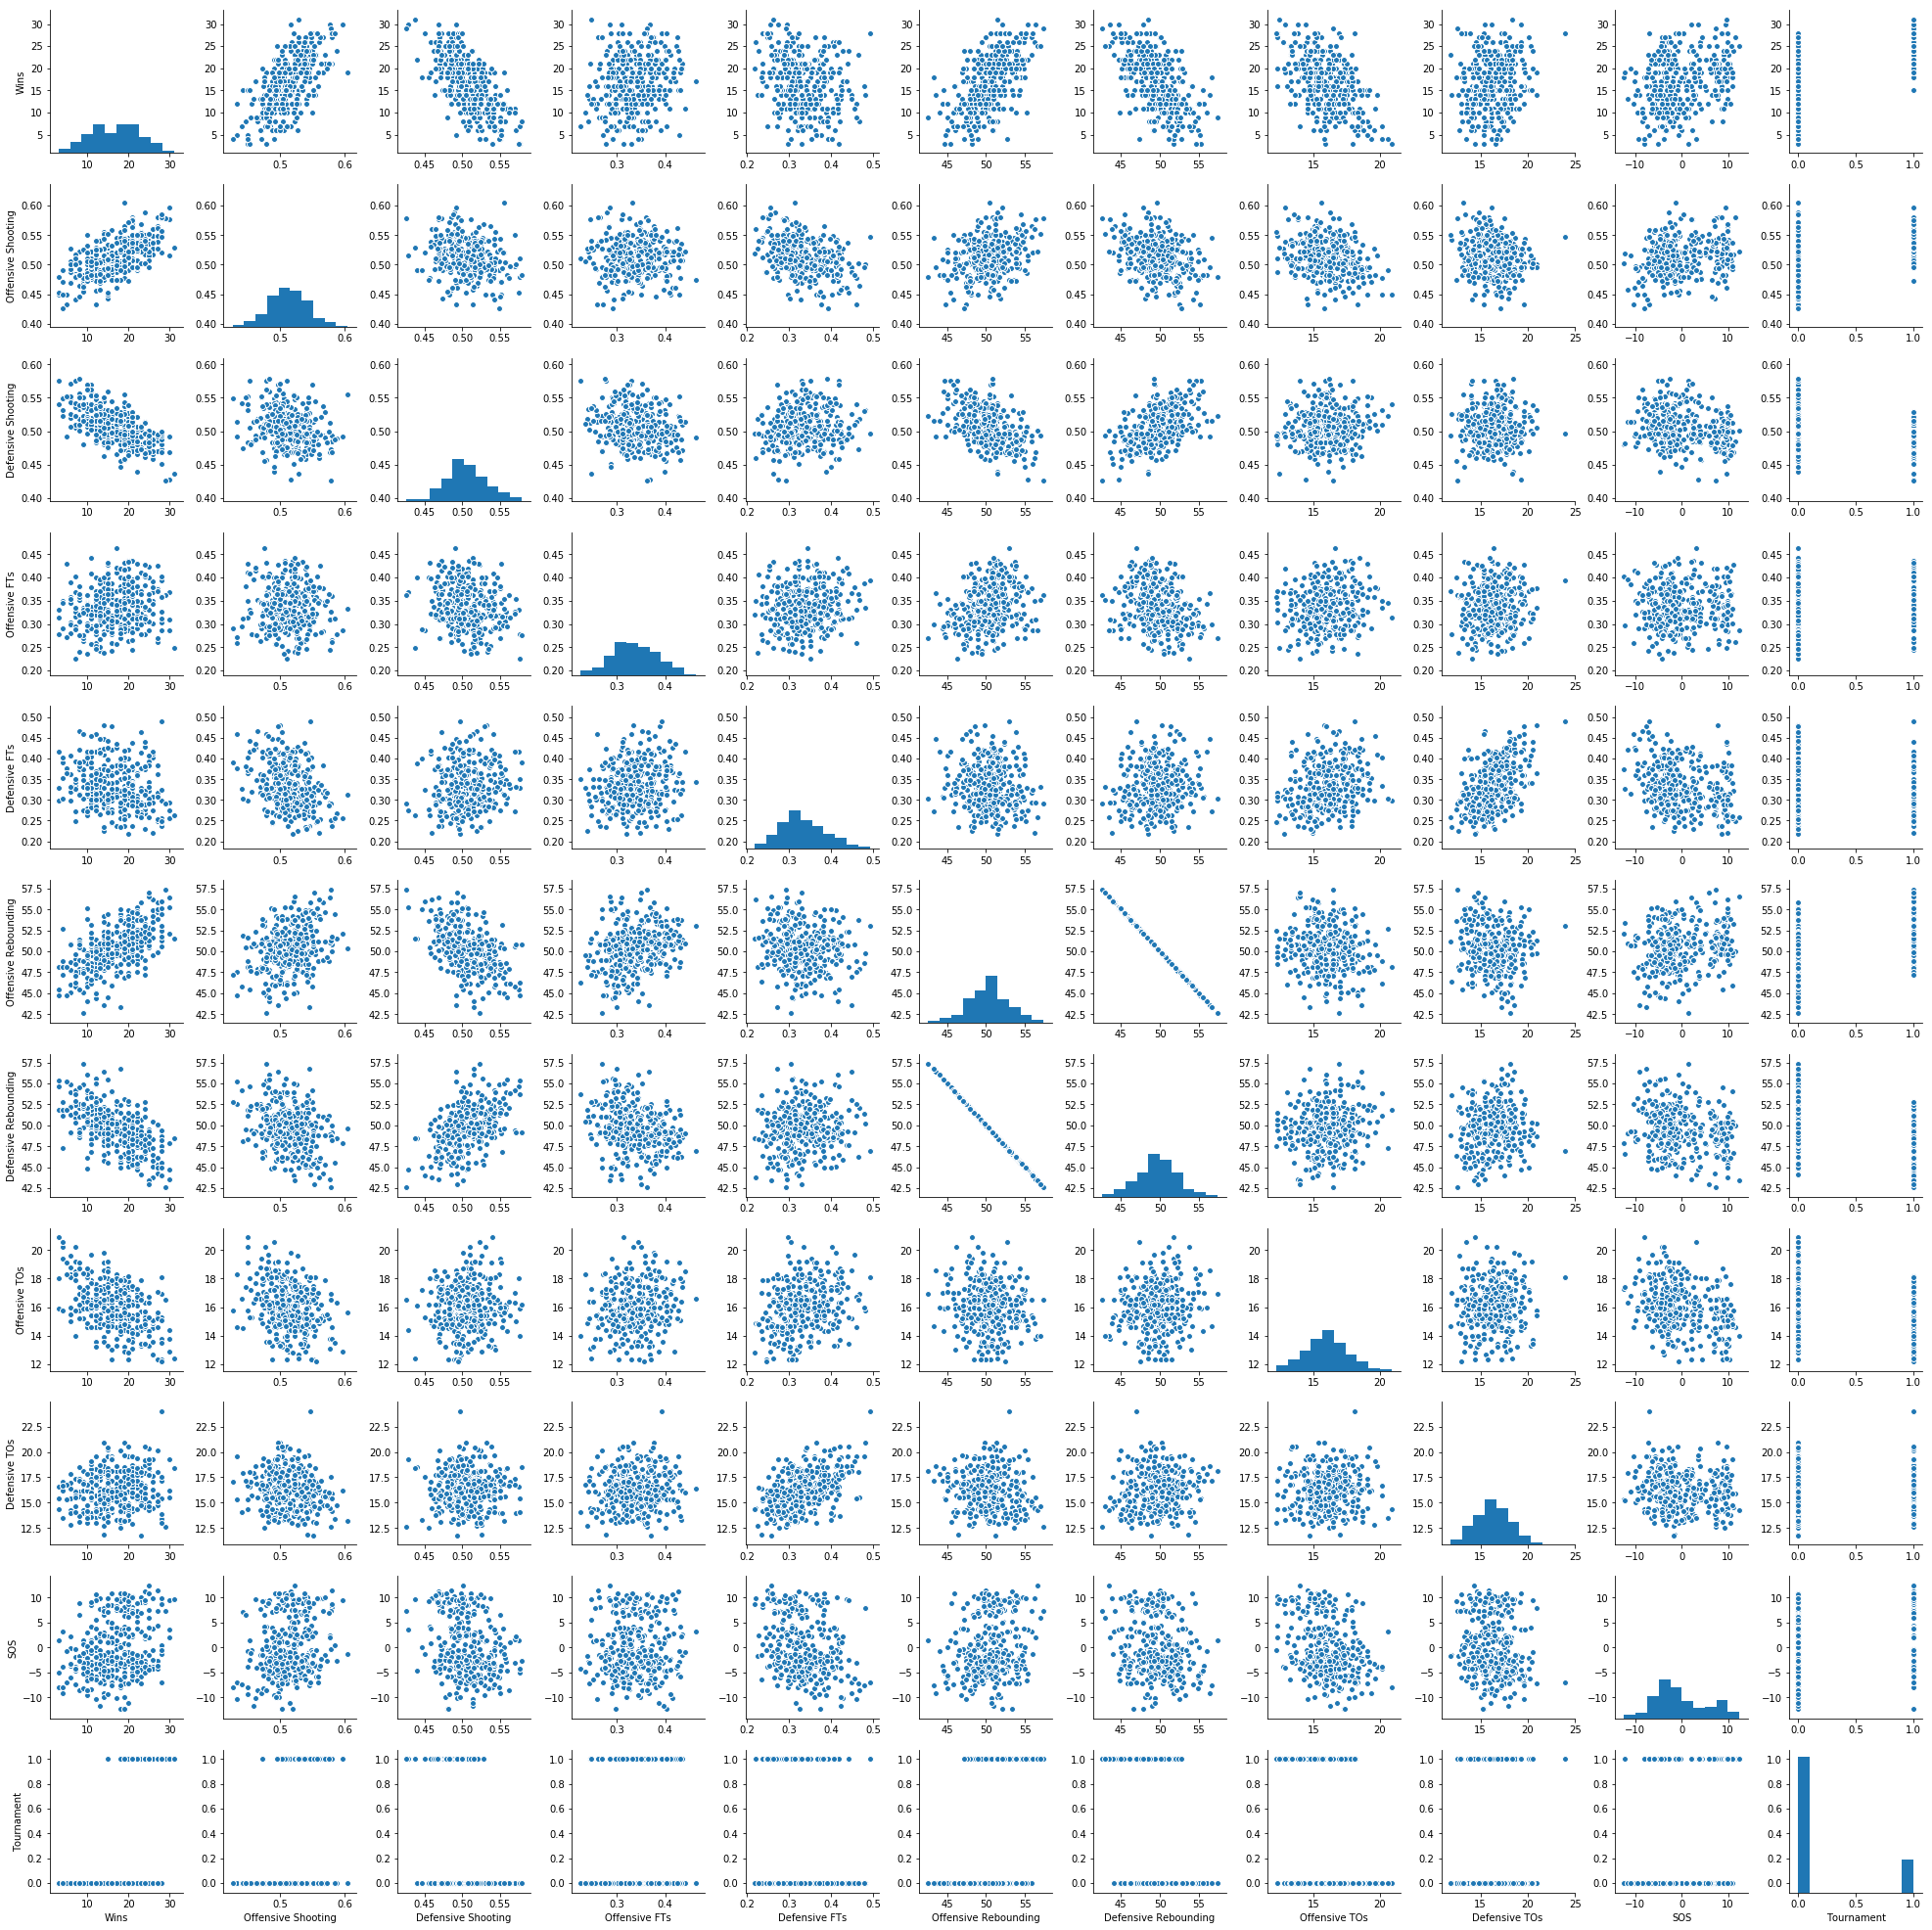

In [326]:
sns.pairplot(NCAA)

<b>Creating a linear model plot (using seaborn's lmplot) of Wins vs. Strength of Schedule (SOS)</b>
<br>

I added strength of schedule to the dataset to see if it had any effect on winning performance, but it seems that there isn't a strong linear relationship between them as there are teams who performed well and poorly with hard and easy schedules respectively.

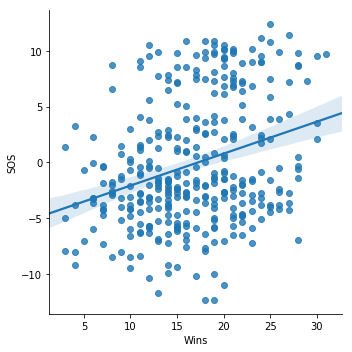

In [327]:
sns.lmplot(x='Wins', y ='SOS', data =NCAA)

<b>Distribution of Wins</b>
<br>
Most basketball teams had between 15 and 20 wins.

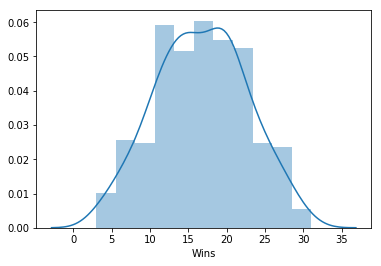

In [328]:
sns.distplot(NCAA['Wins'])

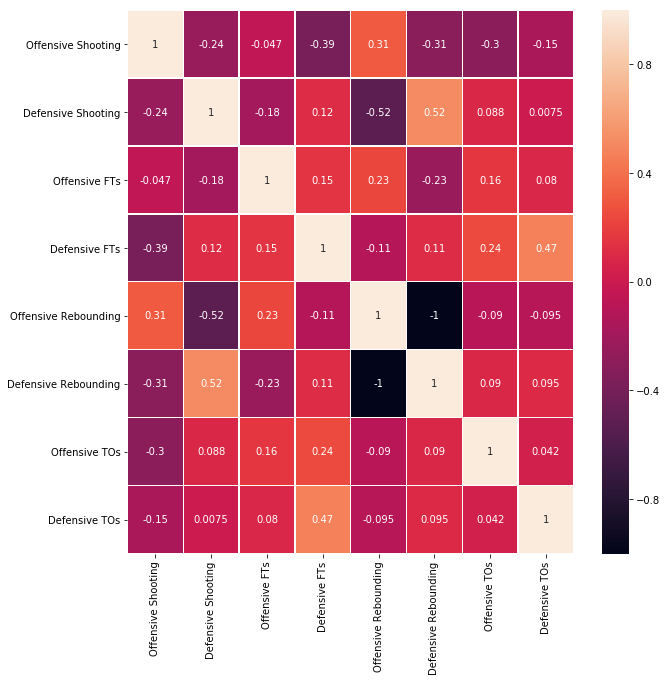

In [329]:
Four_Factors = NCAA.drop(['Wins','Tournament','SOS'], axis =1, inplace=True)

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(NCAA.corr(),annot=True, linewidths=.5, ax=ax)

<b><u>Correlations of the Four Factors</u></b>
<br>

<b>The four factors are somewhat correlated with one another. Here are the top 5 correleations:</b>

• There is a .52 correlation between defensive shooting percentage and defensive rebounding. This means that teams that give up a high shooting percentage tend to be poor defensive rebounding teams. This is reasonable because if a team fails to rebound its opponents’ missed shots, they will in all likelihood get many easy inside shots or dunks on  follow up shots. 

• There is a -.52 correlation between defensive shooting percentage and offensive rebounding. This means that teams that give up a high shooting percentage tend to be poor offensive rebounding teams vice verca. 

• There is a .47 correlation between defensive turnovers and defensive free throws. This means that teams that are good at forcing turnovers turnovers on defense tend to give up a lot of points on the free throw line. This could be due to defensive teams getting into foul trouble against their opponents when trying to force a turnover against them.

• There is a .42 correlation between defensive turnovers and offensive turnovers. This means that teams that are good at forcing turnovers turnovers on defense tend to give commit turnovers as well. Some college basketball teams could be a primarily skilled defensive team rather than an efficient offensive team.

• There is a -.39 correlation between offensive shooting and defensive free throws This means that teams that are good at shooting and scoring points tend tend to give up a lot of points on the free throw line.Some college basketball teams could be a primarily skilled defensive team rather than an efficient offensive team.








<b>Running a regression using the data, we can predict a team’s number of wins from the following four independent variables by subtracting between the offense and defensive variables of the four factors:</b>
<br>
• Offensive Shooting - Defensive Shooting = Shooting
<br>
• Offensive FTs - Defensive FTs = FTs
<br>
• Offensive Rebounding - Defensive Rebounding =Rebounding
<br>
• Offensive Turnovers - Defensive Turnovers = Turnovers


In [479]:
#Reading in data again
NCAA = pd.read_csv('NCAA 2017-18.csv')

NCAA['Shooting'] = NCAA['Offensive Shooting'] - NCAA['Defensive Shooting']
NCAA['FTs'] = NCAA['Offensive FTs'] - NCAA['Defensive FTs']
NCAA['Rebounding'] = NCAA['Offensive Rebounding'] - NCAA['Defensive Rebounding']
NCAA['TOs'] = NCAA['Offensive TOs'] - NCAA['Defensive TOs']


#Drop Old Labels
NCAA.drop(['Offensive Shooting','Defensive Shooting',
       'Offensive FTs', 'Defensive FTs', 'Offensive Rebounding',
       'Defensive Rebounding', 'Offensive TOs', 'Defensive TOs','Tournament','SOS'], axis =1, inplace=True)



<b>Creating  New_NCAA to represent changes</b>:

In [480]:
#Creating new variable New_NCAA to represent changes
New_NCAA = NCAA

In [481]:
#Columns of newly created variables
New_NCAA.columns

Index(['School', 'Wins', 'Shooting', 'FTs', 'Rebounding', 'TOs'], dtype='object')

In [482]:
#Quick view of the adjusted dataframe
New_NCAA.head()

,School,Wins,Shooting,FTs,Rebounding,TOs
0,Abilene Christian,16,0.022,-0.113,-0.6,-1.8
1,Air Force,12,-0.059,-0.010,-2.6,-2.0
2,Akron,14,-0.014,-0.065,-1.8,1.1
3,Alabama A&M,3,-0.090,0.016,-3.6,6.5
4,Alabama,19,0.044,0.046,0.4,1.5


In [541]:
New_NCAA.describe()

,Wins,Shooting,FTs,Rebounding,TOs
count,351.000000,351.000000,351.000000,351.000000,351.000000
mean,16.703704,0.006940,0.002969,0.734473,-0.281481
std,5.944309,0.044684,0.064382,5.120550,2.389746
min,3.000000,-0.123000,-0.201000,-14.800000,-7.100000
25%,12.000000,-0.025000,-0.041000,-2.400000,-1.700000
50%,17.000000,0.009000,0.008000,1.000000,-0.200000
75%,21.000000,0.038500,0.042000,3.800000,1.200000
max,31.000000,0.152000,0.178000,14.800000,7.100000


<b>Creating a linear model plot of Wins vs. Shooting.</b>

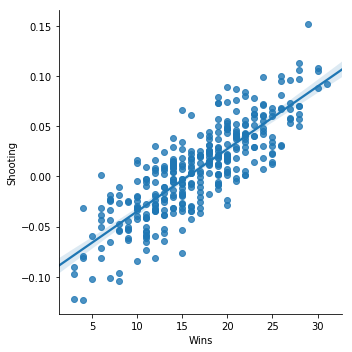

In [498]:
sns.lmplot(x='Wins', y ='Shooting', data =New_NCAA)

<b>Creating a linear model plot of Wins vs. Rebounding</b>

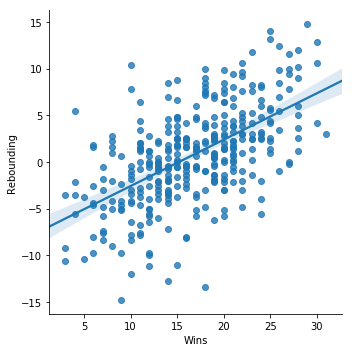

In [499]:
sns.lmplot(x='Wins', y ='Rebounding', data =New_NCAA)

<b>Creating a linear model plot of Wins vs. Free Throws.</b>

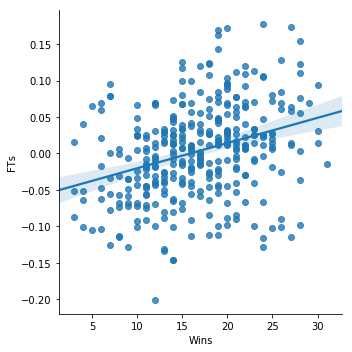

In [500]:
sns.lmplot(x='Wins', y ='FTs', data =New_NCAA)

<b>Creating a linear model plot of Wins vs. Turnovers</b>

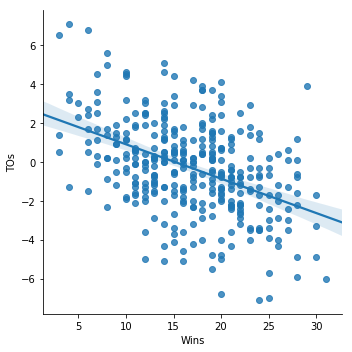

In [502]:
sns.lmplot(x='Wins', y ='TOs', data =New_NCAA)

# Training and Test Data

<b>Splitting the data into training and testing sets. Setting a variable X equal to the newly created features of the Four Factor Model and a variable y equal
to the "Wins" column.</b>


In [505]:
X = New_NCAA[[
        'Shooting', 'FTs', 'Rebounding',
       'TOs']]

y = New_NCAA['Wins']

In [506]:
from sklearn.model_selection import train_test_split

<b>Using model_selection.train_test_split from sklearn to split the data into training and testing
sets. Set test_size=.20 and random_state=0</b>

In [507]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 0)

# Training the Model

<b>Import LinearRegression from sklearn.linear_model</b>

In [508]:
from sklearn.linear_model import LinearRegression

<b>Creating an instance of a LinearRegression() model named lm.</b>

In [488]:
lm = LinearRegression()

<b>Train/fit lm on the training data</b>

In [489]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<b>Printing out the coefficients of the model</b>

In [490]:
print(lm.intercept_)

15.6946959234


In [491]:
lm.coef_

array([ 81.67195688,  12.7621006 ,   0.25431878,  -1.02048412])

# Predicting Test Data

<b>Using lm.predict() to predict off the X_test set of the data.</b>

In [492]:
predictions = lm.predict(X_test)

<b>Creating a scatterplot of the real test values versus the predicted values.</b>

Text(0,0.5,'Predicted Y')

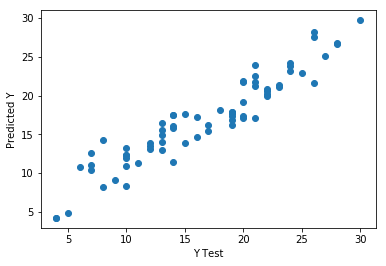

In [493]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

# Evaluating the Model

In [494]:
from sklearn import metrics

print('MSE', metrics.mean_squared_error(y_test,predictions))
print('MAE', metrics.mean_absolute_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MSE 5.07588594282
MAE 1.83732571491
RMSE: 2.25297269021


<b>These four independent variables explain 88% of the variation in the number of games won.</b>

In [495]:
metrics.explained_variance_score(y_test,predictions)

0.88071431213279205

# Residuals

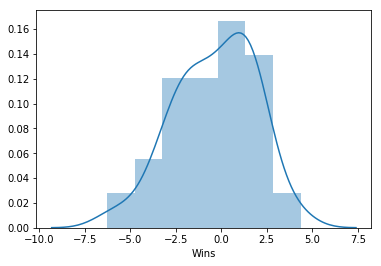

In [516]:
sns.distplot((y_test-predictions),bins=7);

# Conclusion

<b>How can we interpret these coeﬃcients?</b>

In [476]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])
cdf

,Coeff
Shooting,81.671957
FTs,12.762101
Rebounding,0.254319
TOs,-1.020484


<b>Updated correlation of Four Factors</b>

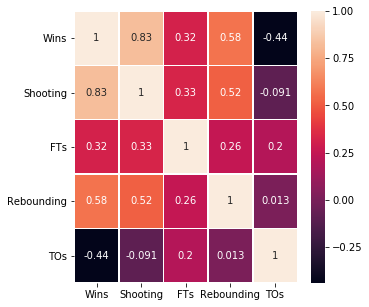

In [464]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.heatmap(NCAA.corr(),annot=True, linewidths=.5, ax=ax)

<b>To measure the impact of the four factors on wins, we can look at the correlations between the four factors and wins:</b>

<br>
• Offensive Shooting - Defensive Shooting has a .83 correlation with wins and by itself explains 71% of the variation in wins.
<br>
• Offensive Rebounds - Defensive Rebounds has a 0.58 correlation with wins and by itself explains 25% of the variation in wins.
<br>
• Offensive Turnovers - Defensive Turnovers has a -0.44 correlation with wins and by itself explains 23% of the variation in wins.
<br>
• Offensive FTs - Defensive FTs has a 0.58 correlation with wins and by itself explains 11% of the variation in wins.


<b>This analysis indicates that NCAA basketball teams’ differential on shooting percentage is by far the most important factor in their success. The relative importance of the four factors are summarized as follows:</b>
<br>

<b>• A 0.01 improvement in Offensive Shooting - Defensive Shooting is worth .82 wins. That is any of the following improvements:</b>
1. improve our EFG 1% (say, from 43% to 44);
2. reduce our opponent’s EFG by 1%; or 
3. improve our EFG by 0.5% and cut our opponent’s EFG by 0.5% should on average cause us to win .82 more games.
<br>

<b>• An 0.01 improvement in Offensive TOs - Defensive TOs is worth -.01 wins (inverse relationship). Thus:</b>
1. one less turnover per 100 possessions; or 
2. one less turnover per 200 possessions and causing one more turnover per 200 possessions would lead to -.01 more wins.
<br>

<b>• An increase of 0.01 in Offensive Rebounds - Defensive Rebounds would lead on average to .0025 more wins per season. Thus any of the following combinations would be expected to lead to .0025 more wins:</b>
1. one more offensive rebound per 100 missed shots;
2. one more defensive rebound per 100 shots missed by opponent; or 
3. one more offensive rebound per 200 missed shots and one more offensive rebound per 200 shots missed by an opponent.
<br>

<b>• An increase of 0.01 in Offensive FTs - Defensive FTs would be expected to lead to 0.13 wins. Therefore any of these three combinations would be expected to lead to 0.44 wins:</b>
1. one more free throw made per 100 ﬁeld goal attempts; 
2. one less free throw given up per 100 ﬁeld goal attempts by opponent; or
3. one more free throw made per 200 ﬁeld goal attempts and one less free throw given up per 200 ﬁeld goal attempts. 

# Bonus: Comparing Tournament and Non-Tournament Teams

In [524]:
#Reading in data again
NCAA = pd.read_csv('NCAA 2017-18.csv')

<b>Wins</b>

In [526]:
Tournament = NCAA.groupby(['Tournament']).mean()['Wins']
Tournament

Tournament
0    15.010601
1    23.750000
Name: Wins, dtype: float64

<b>Strength of Schedule</b>

In [527]:
Tournament = NCAA.groupby(['Tournament']).mean()['SOS']
Tournament

Tournament
0   -1.221201
1    4.240588
Name: SOS, dtype: float64

<b>Offensive Shooting</b>

In [528]:
Tournament = NCAA.groupby(['Tournament']).mean()['Offensive Shooting']
Tournament

Tournament
0    0.507491
1    0.536368
Name: Offensive Shooting, dtype: float64

<b>Defensive Shooting (The lower average is better)</b>

In [529]:
Tournament = NCAA.groupby(['Tournament']).mean()['Defensive Shooting']
Tournament

Tournament
0    0.511127
1    0.485412
Name: Defensive Shooting, dtype: float64

<b>Offensive Turnovers (The lower average is better)</b>

In [530]:
Tournament = NCAA.groupby(['Tournament']).mean()['Offensive TOs']
Tournament

Tournament
0    16.312721
1    14.911765
Name: Offensive TOs, dtype: float64

<b>Defensive Turnovers</b>

In [531]:
Tournament = NCAA.groupby(['Tournament']).mean()['Defensive TOs']
Tournament

Tournament
0    16.283392
1    16.486765
Name: Defensive TOs, dtype: float64

<b>Offensive Rebounding</b>

In [532]:
Tournament = NCAA.groupby(['Tournament']).mean()['Offensive Rebounding']
Tournament

Tournament
0    49.981625
1    51.972059
Name: Offensive Rebounding, dtype: float64

<b>Defensive Rebounding</b>

In [533]:
Tournament = NCAA.groupby(['Tournament']).mean()['Defensive Rebounding']
Tournament

Tournament
0    50.018375
1    48.027941
Name: Defensive Rebounding, dtype: float64

<b>Offensive Free Throws</b>

In [535]:
Tournament = NCAA.groupby(['Tournament']).mean()['Offensive FTs']
Tournament

Tournament
0    0.334410
1    0.345632
Name: Offensive FTs, dtype: float64

<b>Defensive Free Throws (The lower average is better)</b>

In [536]:
Tournament = NCAA.groupby(['Tournament']).mean()['Defensive FTs']
Tournament

Tournament
0    0.337413
1    0.317809
Name: Defensive FTs, dtype: float64